In [20]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import xgboost as xgb

In [4]:
def mse(y,yhat):
    try:
        n = len(y)
    except TypeError:
        n = y.shape[0]
    return (1/n)*sum([(_y-_yhat)**2 for _y, _yhat in zip(y,yhat)])

##### Hi there! The ### mean that you have to fill in the code. Have fun :-)
##### Also, you don't have to use the stuff below. It's only here to get you going, in case you need it.

In [5]:
# Get data
boston = load_boston()

boston_dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_dataset["MEDV"] =  boston.target

# Use only a subset of features for computation time and brain power (Rooms, age, tax, crime rate, pupil teacher ratio)
features_to_use = ["RM", "AGE", "TAX", "CRIM", "PTRATIO"]
x_data = boston_dataset[features_to_use]
y_data = boston_dataset.MEDV

x_train, x_notrain, y_train, y_notrain = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_notrain, y_notrain, test_size=0.5, random_state=42)

In [15]:
# Instantiate and fit XGBoost model
regressor =  xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

regressor =  xgb.XGBRegressor()

regressor.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

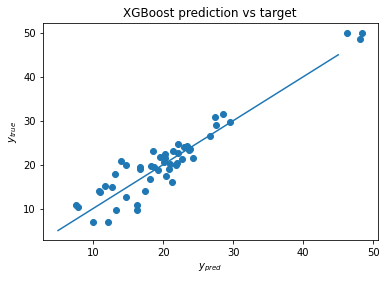

Mean squared error:  8.789421318435156
Mean y_test:  21.029411764705884


In [16]:
# Predict using XGBoost model and plot prediction vs true labels
y_pred_xgb = regressor.predict(x_test)

plt.scatter(y_pred_xgb, y_test)
plt.plot([5,45],[5,45])
plt.xlabel(r"$y_{pred}$")
plt.ylabel(r"$y_{true}$")
plt.title("XGBoost prediction vs target")
plt.show()

print("Mean squared error: ", mse(y_test, y_pred_xgb))
print("Mean y_test: ", np.mean(y_test))

In [62]:
# Neural networks usually require preprocessing. Try different things.
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

# Build and fit neural network model (this architecture is a bit random. Play around with it.)

output_shape = 1 # regression
epochs = 100

### Add layers to the model
model = Sequential(layers=[
    tf.keras.Input(shape=(len(features_to_use),)),
    Dense(8, activation="relu"),
    Dense(4, activation="relu"),
    Dense(output_shape, activation="linear")
])

model.summary()
model.compile(loss="mse",
              optimizer=Adam(learning_rate=1e-2),
              metrics=["accuracy"])

### Fit the model (and record history if you like
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), batch_size=64, epochs=epochs)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_56 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
7/7 [==============================] - 1s 33ms/step - loss: 598.1171 - accuracy: 0.0000e+00 - val_loss: 526.0081 - val_accuracy: 0.0000e+00
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 582.9400 - accuracy: 0.0000e+00 - val_loss: 503.5095 - val_accuracy: 0.0000e+00
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 560.3318 - ac

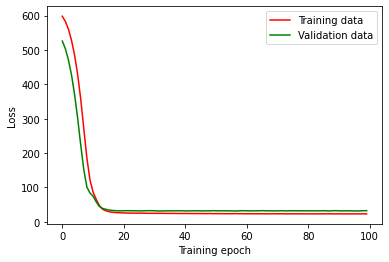

In [63]:
# Plot training history to see at which epoch training should stop 
# (usually when validation loss flattens out while training loss keeps decreasing)
plt.plot(list(range(epochs)), history.history["loss"], c="red", label="Training data")
plt.plot(list(range(epochs)), history.history["val_loss"], c="green", label="Validation data")
plt.xlabel("Training epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

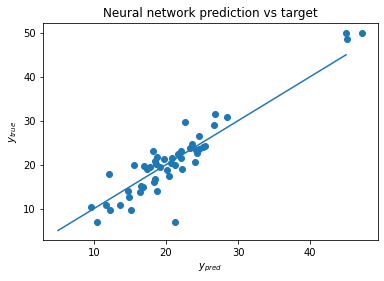

Mean squared error:  [11.732877]
Mean y_test:  21.029411764705884


In [64]:
# Predict using neural network model and plot prediction vs true labels
y_pred = model.predict(x_test)

plt.scatter(y_pred, y_test)
plt.plot([5,45],[5,45])
plt.xlabel(r"$y_{pred}$")
plt.ylabel(r"$y_{true}$")
plt.title("Neural network prediction vs target")
plt.show()
print("Mean squared error: ", mse(y_test, y_pred))
print("Mean y_test: ", np.mean(y_test))

In [65]:
# Out of the box, XGBoost performs pretty well while the neural network can struggle.
# Play around with the different layers and see if you can make a good architecture 
# that solves this regression task.
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 8)                 48        
_________________________________________________________________
dense_56 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 5         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
